<a href="https://colab.research.google.com/github/Damian25-lamn/aprendizaje-automatico-252601/blob/main/Minda_anthony_4_3_m_todos_de_clustering_basados_en_particiones_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.3: Taller de Métodos de clustering basados en particiones Parte 2**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones, como el K-means y el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [ ]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


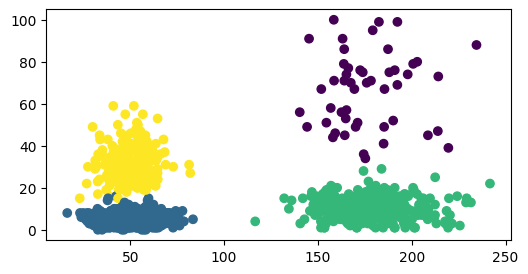

In [ ]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-means que tiene un único parámetro: el número de clústeres (K).**

In [ ]:
# PASO 1 elejir los centros iniciales de forma randomica
def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

def paso1_elije_centros(K, Dx):
  cDx = np.zeros(K*Dx.shape[1])
  cDx.shape = (K,Dx.shape[1])
  # 1.1 Completa el codigo aqui
  x1 = random_sample_float(K, np.min(Dx[:,0]), np.max(Dx[:,0]))
  x2 = random_sample_float(K, np.min(Dx[:,1]), np.max(Dx[:,1]))
  cDx[:,0] = x1
  cDx[:,1] = x2
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[158.37528272  83.03663162]
 [211.73268189  14.54424109]
 [ 36.0456747    1.94527425]
 [221.83559875  57.02782592]]


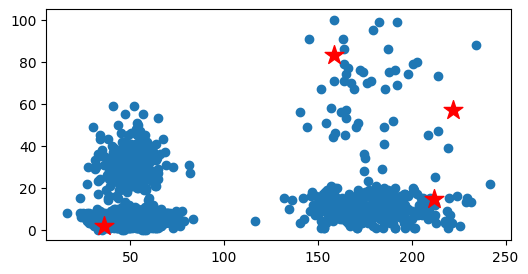

In [ ]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_centros(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al centroide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [ ]:
# Definimos la distancia euclidiana de una instancia x con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
  return np.linalg.norm(C - x, axis=1);

def paso2_asigna_puntos(Dx, cDx):
  Dyp = np.zeros(Dx.shape[0])
  # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
  for i in np.arange(Dx.shape[0]):
      # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
      # a cada centro existente en cDx. Podemos utilizar para ello la función
      # distancia_euclidiana_grupo.

      distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i],cDx ) # 1.2 Completa el codigo aqui

      # Una vez calculada la distancia, necesitamos averiguar el índice de
      # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
      pred_y = np.argmin(distancia_punto_a_centros)
      Dyp[i] = pred_y
  return Dyp

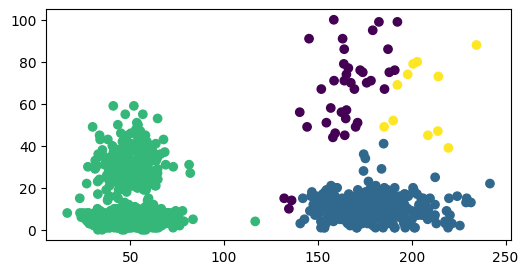

In [ ]:
Dyp = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)

2.   Paso de actualización del centroide
En este paso se recalcula el centroide de cada cluster, teniendo en cuenta la nueva asignación calculada en el paso 1. Para ello, se calcula la media de todos los puntos asignados en el paso anterior.

$$
c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i
$$


In [ ]:
def paso3_actualiza_centros(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  for k in range(K):
      # Seleccionamos los puntos asignados al cluster k
      puntos_cluster_k = Dx[Dyp == k]
      # Calculamos la media de las coordenadas x e y
      if len(puntos_cluster_k) > 0:  # Evitar división por cero si el cluster está vacío
          cDx[k,:] = np.mean(puntos_cluster_k, axis=0) # 1.3 Completa el codigo aqui
      else:
          # Si el cluster está vacío, mantenemos el centroide anterior
          cDx[k,:] = cDx_ant[k,:]
  return cDx

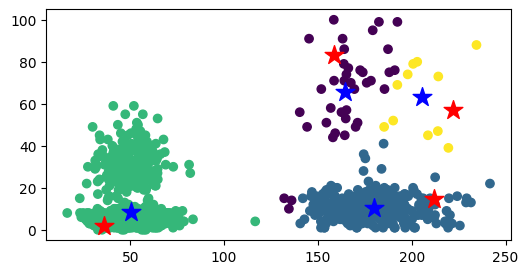

In [ ]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_centros(Dx, cDx, Dyp, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [ ]:
def MyKMeans(Dx, K):
  cDx = paso1_elije_centros(K, Dx) # 1.4 Completa el codigo aqui
  cDxIni = cDx.copy()
  # Flag de convergencia
  iterando = True
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx) # 1.5 Completa el codigo aqui
    # Calcular los nuevos centros
    # 1.6 Completa el codigo aqui
    cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp, cDxIni

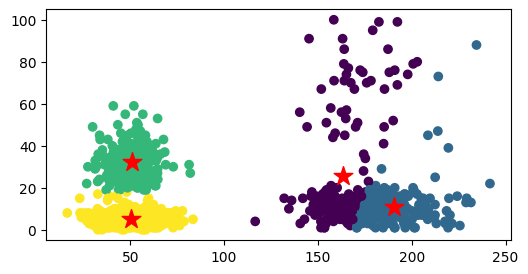

In [ ]:
cDx, Dyp,cDxIni = MyKMeans(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 1: MODIFICA KMEANS PARA QUE SE CONVIERTA EN KMEANS++**

In [ ]:
def distancia_euclidiana(a, b):
  return np.sqrt(np.sum((a - b) ** 2, axis=1))

def paso1_elije_centros_inteligente(K, Dx):
  cDx = np.zeros(K*Dx.shape[1])
  cDx.shape = (K,Dx.shape[1])

  # Paso 1: Primer centroide aleatorio,se elige aleatoriamente
  #        un punto de datos como primer centroide.
  n_samples, n_features = Dx.shape
  first_idx = np.random.randint(n_samples)
  cDx[0] = Dx[first_idx]

  # Pasos 2-4: Elegir centroides restantes
  for k in range(1, K):
      # Calcular distancias al centroide más cercano
      distances = np.zeros(n_samples)
      for i in range(n_samples):
          # Distancias del punto i a todos los centroides existentes
          point = Dx[i]
          dist_to_centroids = distancia_euclidiana(
              cDx[:k],
              np.tile(point, (k, 1))
          )
          # Guardar la distancia mínima
          distances[i] = np.min(dist_to_centroids)   # 1.1 Completa tu codigo aqui
      # Convertir distancias a probabilidades
      probabilities = distances ** 2
      probabilities /= probabilities.sum()

      # Elegir siguiente centroide basado en probabilidades
      next_idx = np.random.choice(n_samples, p=probabilities)
      cDx[k] = Dx[next_idx]
  return cDx

In [ ]:
def MyKMeansPlusPlus(Dx, K):
  cDx = paso1_elije_centros_inteligente(K, Dx) # 1.3 Completa el codigo aqui
  cDxIni = cDx.copy()
  # Flag de convergencia
  iterando = True
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx) # 1.4 Completa el codigo aqui
    # Calcular los nuevos centros
    cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K) # 1.5 Completa el codigo aqui
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp, cDxIni

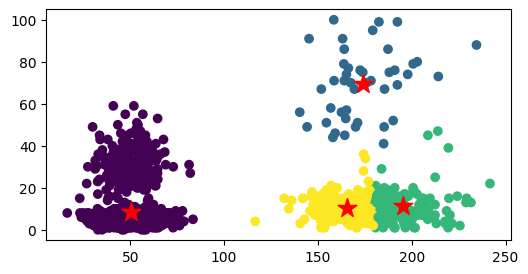

In [ ]:
cDx, Dyp,cDxIni = MyKMeansPlusPlus(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 2: USA EL METODO DEL CODO CON KMEANS++ PARA DETERMINAR EL MEJOR K**
<hr>
<h2>Elegir el mejor valor de K</h2>

Para elegir el mejor valor de K se suele usar la técnica del codo. Ésta consiste en probar diferentes valores de K y evaluar el agrupamientos según alguna medida de evaluación intrínseca (ya que se supone que no se conoce la verdad básica). En este ejemplo, se usan dos medidas diferentes: la medida de Silueta y la R cuadrado.


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
def medida_R_cuadrado(X, Xyp, cXs):
    # Calcular SST (Suma Total de Cuadrados)
    centro_global = np.mean(X, axis=0)
    SST = np.sum(np.sum((X - centro_global)**2, axis=1))
    # Calcular SSE (Suma de Cuadrados del Error)
    SSE = 0
    for i in range(len(X)):
        # Encontrar el centroide correspondiente para cada punto
        cluster_label = int(Xyp[i])
        centroide = cXs[cluster_label]
        SSE += np.sum((X[i] - centroide)**2)

    # Calcular R²
    if SST == 0:
        return 1.0
    R_cuadrado = 1 - (SSE / SST)
    return R_cuadrado

Text(0, 0.5, 'Medida de R cuadrado')

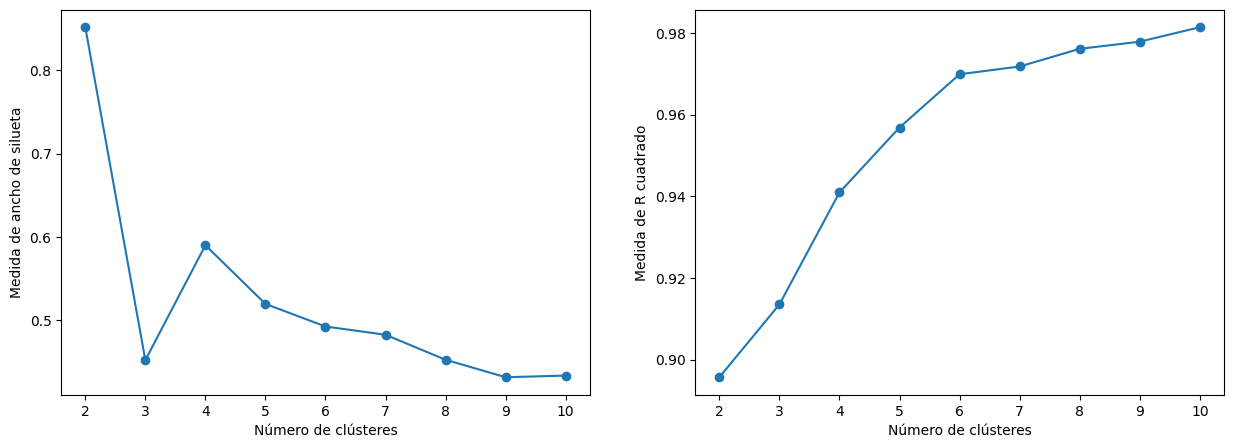

In [ ]:
#METODO DEL CODO
# voy a probar para valores de k desde 2 al 11
rsilueta = np.zeros(9)
rrsquare = np.zeros(9)
for k in np.arange(2,11):
    cDx, Dyp,cDxIni = MyKMeansPlusPlus(Dx, k)
    rsilueta[k-2] = silhouette_score(Dx, Dyp)          # 2.1 Completa el codigo aqui
    rrsquare[k-2] = medida_R_cuadrado(Dx, Dyp, cDx)    # 2.2 Completa el codigo aqui

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( np.arange(2,11),rrsquare, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de R cuadrado")

### Redacte una conclusión que analice los gráficos del método del codo y del coeficiente de silueta (y/o R²) para la selección del número de clusters (k). Indique cuál es el valor óptimo de k y fundamente su elección con base en la interpretación de dichos gráficos.


De acuerdo con la evaluación intrínseca, el coeficiente de Silueta muestra su mayor consistencia en **k=2** y un máximo local en **k=4**, decayendo a partir de ahí. Por otro lado, la métrica R cuadrado muestra un crecimiento constante, estabilizándose (formando un 'codo') cerca de **k=5** o **k=6**. Aunque **k=2** tiene la silueta más alta, **k=6** se identifica como un punto óptimo de compromiso, ya que logra un **R^2** elevado (superior al 0.96) sin sacrificar excesivamente la cohesión de la silueta, permitiendo una segmentación más detallada de los datos sin llegar a la sobresegmentación.

## Métricas disponibles en KMeans de scikit-learn
El objeto KMeans de scikit-learn proporciona varias métricas y atributos importantes para evaluar el clustering:


Text(0, 0.5, 'Medida de incercia')

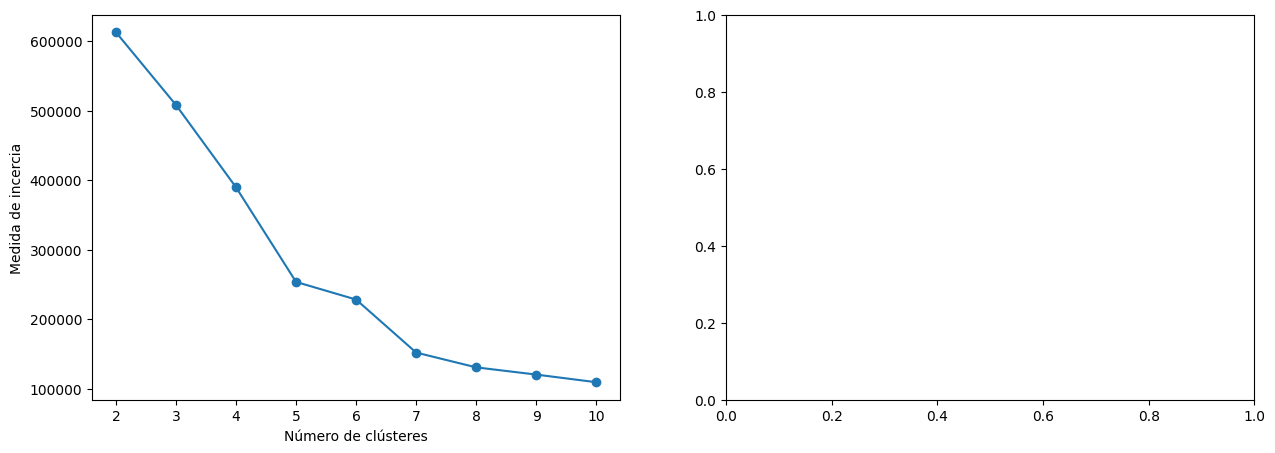

In [ ]:
from sklearn.cluster import KMeans

rincercia = np.zeros(9)
for k in np.arange(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Dx)
    rincercia[k-2] =  kmeans.inertia_

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rincercia, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de incercia")

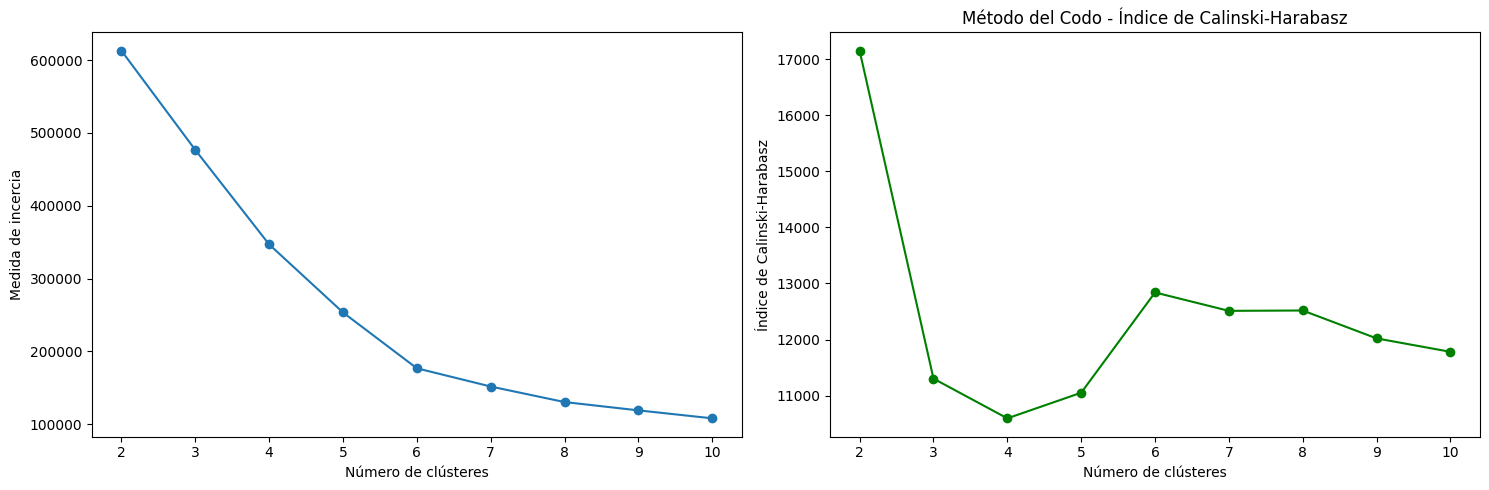

In [ ]:
# 2.3 Complete el codigo anterior para graficar el indice de calinski
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

rincercia = np.zeros(9)
rcalinski = np.zeros(9)
for k in np.arange(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(Dx)
    rincercia[k-2] =  kmeans.inertia_
    rcalinski[k-2] = calinski_harabasz_score(Dx, kmeans.labels_)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rincercia, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de incercia")

ax[1].plot( np.arange(2,11),rcalinski, linestyle='-', marker='o', color='green')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Índice de Calinski-Harabasz")
ax[1].set_title("Método del Codo - Índice de Calinski-Harabasz")
plt.tight_layout()

### Redacte una conclusión comparativa basada en el gráfico de inercia (método del codo) y el índice de Calinski-Harabasz. Determine el número óptimo de clusters (k) e interprete cómo cada métrica justifica dicha selección.

Tras comparar ambas métricas, se determina que el número óptimo de clústeres es **k = 6**. Esta elección se fundamenta en los siguientes puntos observados en los gráficos:

Método del Codo (Inercia):
La gráfica de inercia muestra una disminución abrupta de la varianza interna hasta **k=6**. A partir de este punto, la curva se suaviza significativamente, indicando que añadir más clústeres no reduce la inercia de manera sustancial (punto de inflexión o "codo").

Índice de Calinski-Harabasz:
Esta métrica busca maximizar la dispersión entre clústeres y minimizar la dispersión interna. Después de la caída inicial, se observa un pico local máximo en **k=6**, lo que confirma que en este punto se logra la mejor estructura y separación de los grupos en comparación con los valores adyacentes (**k=5** o **k=7**).

Conclusión: Mientras que la inercia valida que **k=6** es el punto donde la ganancia de precisión se estabiliza, el índice de Calinski-Harabasz actúa como confirmación estadística, señalando que **k=6** ofrece clústeres mejor definidos y más compactos.

# 🎯 **EJ 3: USA EL SIGUIENTE DATASET CON KMEANS++**
Cargue el dataset dataset_cuatro_separables_peque y realice el siguiente análisis de agrupamiento (clustering):

Determinación del k óptimo: Utilice el algoritmo k-means para calcular y graficar el método del codo con un rango de k razonable (por ejemplo, de 2 a 15 clusters).

Selección: Con base en los gráficos, justifique y seleccione el número óptimo de clusters (k_optimo).

Modelo final: Ajuste un modelo final de k-means utilizando el k_optimo.

Visualización: Visualice los resultados del agrupamiento y que los puntos estén coloreados según el cluster asignado. Incluya los centroides en la visualización.

✅ Dataset cargado desde URL GitHub


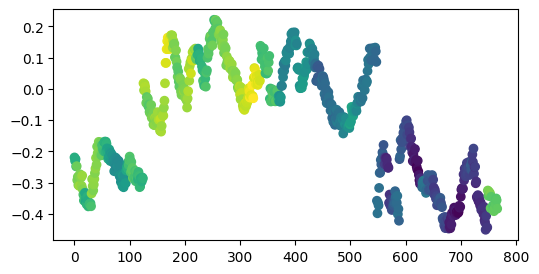

In [ ]:
# Cargar dataset
D = cargar_dataset("dataset_cuatro_separables_peque.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]

# visualización original
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

In [ ]:
# --- 2. DETERMINACIÓN DEL K ÓPTIMO ---
print("Calculando Método del Codo y Silueta...")

inercia = []
silueta = []
rango_k = range(2, 13) # Probamos de 2 a 12 clusters

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(Dx) # OJO: Entrenamos solo con Dx

    inercia.append(kmeans.inertia_)
    silueta.append(silhouette_score(Dx, kmeans.labels_))

Calculando Método del Codo y Silueta...


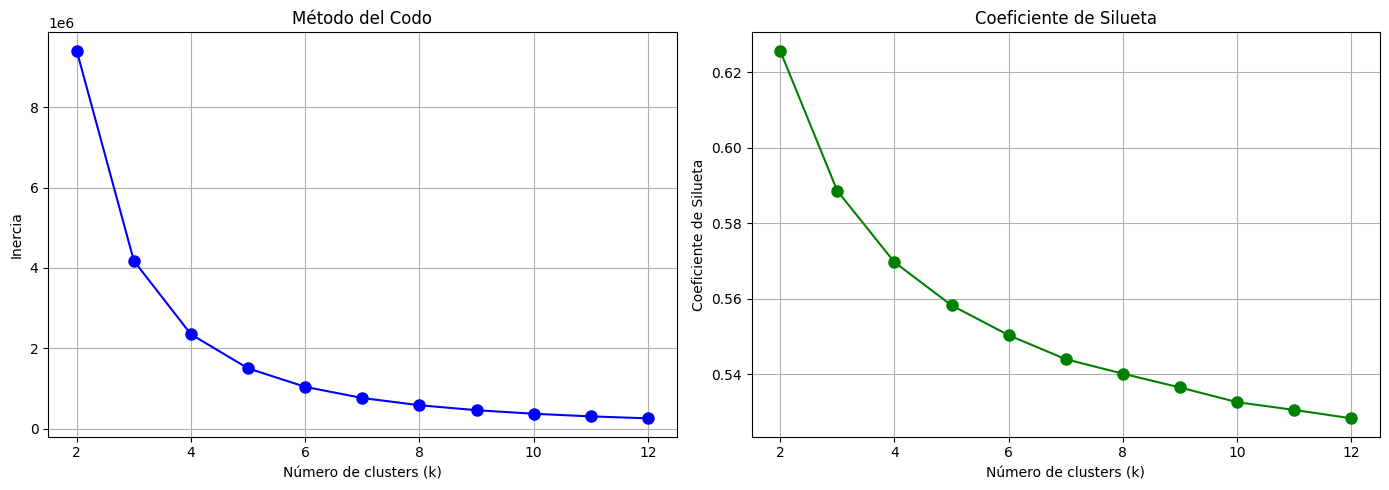

In [ ]:
# Graficamos los resultados para decidir
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica del Codo
ax[0].plot(rango_k, inercia, 'bo-', markersize=8)
ax[0].set_xlabel('Número de clusters (k)')
ax[0].set_ylabel('Inercia')
ax[0].set_title('Método del Codo')
ax[0].grid(True)

# Gráfica de Silueta
ax[1].plot(rango_k, silueta, 'go-', markersize=8)
ax[1].set_xlabel('Número de clusters (k)')
ax[1].set_ylabel('Coeficiente de Silueta')
ax[1].set_title('Coeficiente de Silueta')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# --- 3. SELECCIÓN Y MODELO FINAL ---
# El óptimo será 4.
# (Las gráficas anteriores confirman esto con un codo/pico en k=4).
k_optimo = 4

print(f"Generando modelo final con k_optimo = {k_optimo}...")

# Ajuste del modelo final
modelo_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
etiquetas_predichas = modelo_final.fit_predict(Dx)
centroides = modelo_final.cluster_centers_

Generando modelo final con k_optimo = 4...


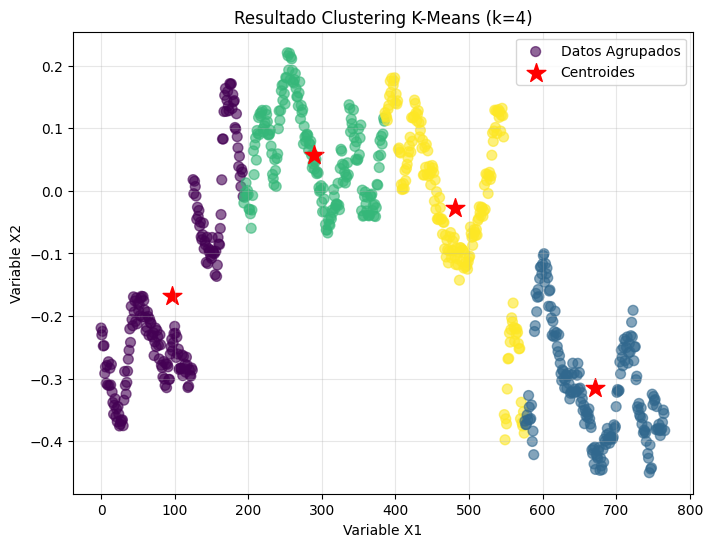

In [ ]:
# --- 4. VISUALIZACIÓN FINAL ---
fig, ax = plt.subplots(figsize=(8, 6))

# Puntos coloreados según el cluster asignado por K-Means
scatter = ax.scatter(Dx[:, 0], Dx[:, 1], c=etiquetas_predichas, cmap='viridis', s=50, alpha=0.6, label='Datos Agrupados')

# Centroides
ax.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, marker='*', label='Centroides')

ax.set_title(f'Resultado Clustering K-Means (k={k_optimo})')
ax.set_xlabel('Variable X1')
ax.set_ylabel('Variable X2')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

Tras evaluar el agrupamiento mediante las métricas de Inercia y el Coeficiente de Silueta, se determina que el número óptimo de clústeres es $k = 4$. Esta decisión se fundamenta en los siguientes hallazgos:

Método del Codo (Inercia): La gráfica muestra un punto de inflexión o "codo" muy marcado en $k=4$. A partir de este valor, la reducción de la inercia se vuelve marginal, indicando que cuatro grupos capturan la estructura fundamental de los datos sin sobreajustar.

Coeficiente de Silueta: Se observa un máximo local significativo en $k=4$, lo que garantiza que los puntos dentro de cada clúster están cohesionados y bien separados de los demás grupos.

Conclsuión: La visualización final confirma que con $k=4$ se logra replicar la morfología de los datos originales, posicionando los centroides de manera equilibrada en cada una de las cuatro ondas del dataset.

# 🚀 ¡TALLER FINALIZADO!"